<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [4]:
sac_csv = '../data/sacramento_real_estate_transactions.csv'
df = pd.read_csv(sac_csv)

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

% matplotlib inline

UsageError: Line magic function `%` not found.


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [6]:
# A:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [7]:
df.zip = df.zip.astype(str)

In [8]:
df.dtypes

street        object
city          object
zip           object
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [9]:
df[df['beds'] ==0].count()

street       108
city         108
zip          108
state        108
beds         108
baths        108
sq__ft       108
type         108
sale_date    108
price        108
latitude     108
longitude    108
dtype: int64

In [10]:
df[df['price'] <= 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [11]:
df.drop(703, inplace=True)

In [12]:
df.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,2.913618,1.777439,1315.253049,234167.841463,38.607670,-121.355832
std,1.307175,0.895484,853.416702,138434.220875,0.145494,0.138268
min,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,2.000000,1.000000,951.500000,145000.000000,38.482714,-121.446121
50%,3.000000,2.000000,1304.000000,214375.000000,38.626257,-121.376010
75%,4.000000,2.000000,1718.500000,300000.000000,38.695611,-121.295557
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [32]:
df1 = df
df2 = df1[df1['beds'] == 0].index
df1 = df1.drop(df2)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     984 non-null    object 
 1   city       984 non-null    object 
 2   zip        984 non-null    object 
 3   state      984 non-null    object 
 4   beds       984 non-null    int64  
 5   baths      984 non-null    int64  
 6   sq__ft     984 non-null    int64  
 7   type       984 non-null    object 
 8   sale_date  984 non-null    object 
 9   price      984 non-null    int64  
 10  latitude   984 non-null    float64
 11  longitude  984 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 99.9+ KB


In [14]:
df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

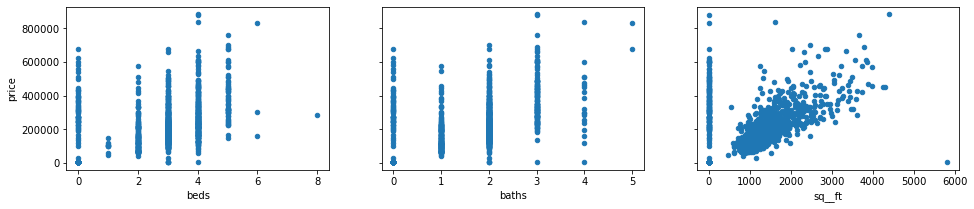

In [21]:
feature_cols = ['beds', 'baths', 'sq__ft']
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    df.plot(kind='scatter', x=feature, y='price', ax=axs[index], figsize=[16,3])

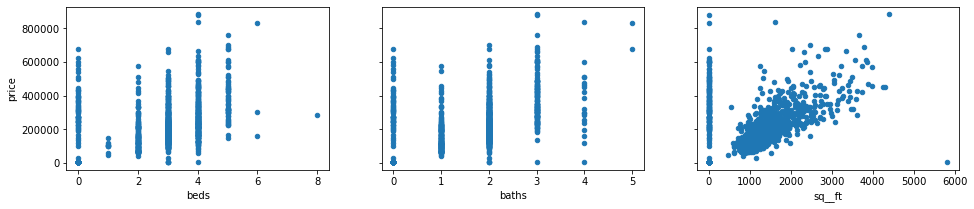

In [17]:
# A
feature_cols = ['beds', 'baths', 'sq__ft']

fig, axs = plt.subplots(1, len(feature_cols), sharey=True)

for index, feature in enumerate(feature_cols):
    df.plot(kind='scatter', x=feature, y='price', ax=axs[index], figsize=[16,3])
    
    
    #bikes.plot(kind='scatter', x='temp', y='total_rentals', alpha=0.1);

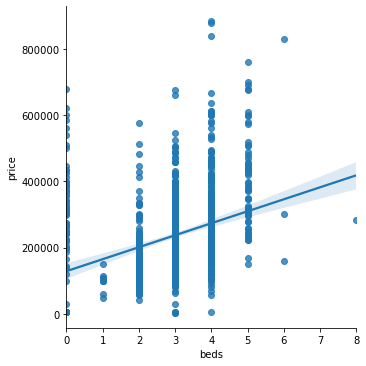

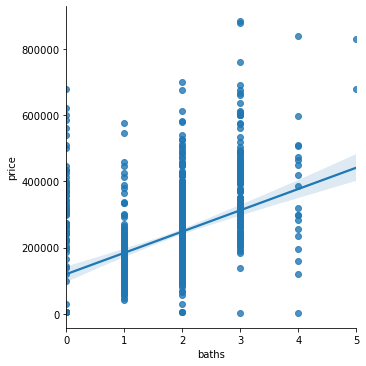

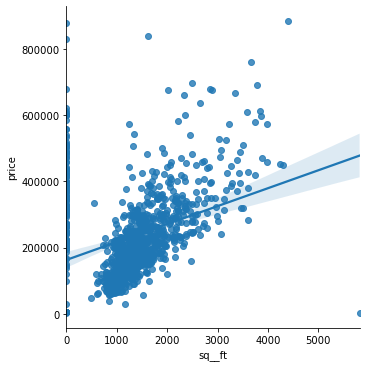

In [43]:
for index, feature in enumerate(feature_cols):
    sns.lmplot(x=feature, y='price', data=df);

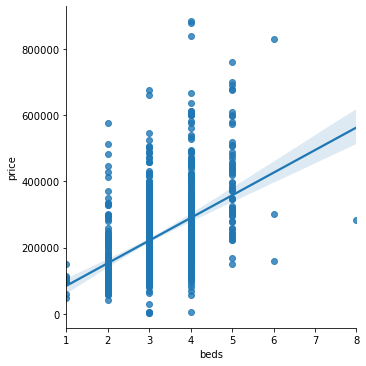

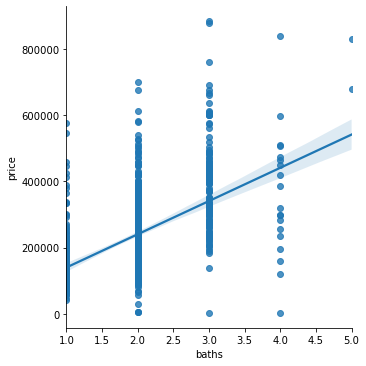

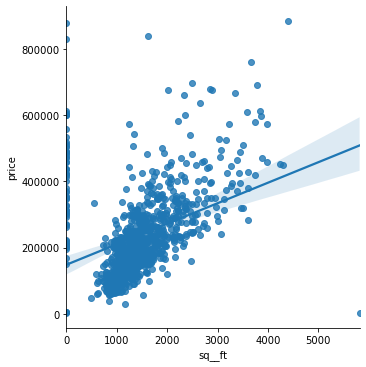

In [33]:
for index, feature in enumerate(feature_cols):
    sns.lmplot(x=feature, y='price', data=df1);

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [5]:
# A:it appears that square footage is the best predictor of y in an slr model 

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [57]:
# A:
import numpy as np
import scipy.stats
from statistics import mean

def lin_reg(x,y):
    m = (((mean(x) * mean(y)) - mean(x*y)) / ((mean(x)**2) - mean(x**2)))
    b = mean(y)- m*mean(x)
    
    return m, b
   

x = df['sq__ft'].values
y = df['price'].values
lin_reg(x,y)
    

(54.18962437091913, 162907.64395224134)

### 6. Interpret the intercept. Interpret the slope.

In [7]:
# A:

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [8]:
# A:

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [9]:
# A: